# Pymaceuticals Inc.
---

### Analysis

- From our boxplots, we can see that the final tumor volume is significantly lower for mice that were on a drug regimen of Capomulin and Ramicane. Our sampled data has very little to no outliers for the drugs selected in our analysis, showing that the mean tumor volume could be the best mesaure of central tendency.

- Our r-value for comparisons of mouse weight against average tumor volume is pretty close 1 (r=0.84). This indicates our analysis is pretty accurate. With that known, Capomulin is more effective in reducing tumor volume in mice that have lower weights.

- By seeing the effect of Capomulin on mouse ID l509, we can see that the reduction of the tumor isn't a smooth line trending down. In fact, in the first few days, it looks like the tumor volume increases. If we assume this is somewhat common among other mice with the same drug regimen, it may be worth to increase timepoint checks. So, instead of checking tumor volume every 10 days, it can be 20 days or longer, so as to minimize potential peaks in our data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
mouse_complete_df=pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
sorted_df = mouse_complete_df.sort_values(by=["Timepoint"], ascending= True)
final_mouse_df = sorted_df.reset_index(drop=True)
final_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [3]:
# Checking the number of mice.
len(final_mouse_df["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateRows=final_mouse_df[final_mouse_df.duplicated()]
duplicateRows["Mouse ID"]

#code retrieved from https://www.statology.org/pandas-find-duplicates/

232    g989
Name: Mouse ID, dtype: object

In [5]:
# alternate method learnt from Tutoring Session
# duplicateRows = final_mouse_df.loc[final_mouse_df.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
# duplicateRows

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
allDuplicateRows=final_mouse_df.loc[final_mouse_df["Mouse ID"]=="g989"]
allDuplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,g989,0,45.000000,0,Propriva,Female,21,26
232,g989,0,45.000000,0,Propriva,Female,21,26
277,g989,5,47.570392,0,Propriva,Female,21,26
335,g989,5,48.786801,0,Propriva,Female,21,26
599,g989,10,49.880528,0,Propriva,Female,21,26
600,g989,10,51.745156,0,Propriva,Female,21,26
736,g989,15,51.325852,1,Propriva,Female,21,26
742,g989,15,53.442020,0,Propriva,Female,21,26
1080,g989,20,54.657650,1,Propriva,Female,21,26
1102,g989,20,55.326122,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = final_mouse_df.loc[final_mouse_df["Mouse ID"]!="g989"]
clean_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df=clean_mouse_df.groupby(["Drug Regimen"])

ave_tumor_volume=grouped_df["Tumor Volume (mm3)"].mean()
median_tumor_volume=grouped_df["Tumor Volume (mm3)"].median()
variance_tumor_volume=grouped_df["Tumor Volume (mm3)"].var()
stdev_tumor_volume=grouped_df["Tumor Volume (mm3)"].std()
sem_tumor_volume=grouped_df["Tumor Volume (mm3)"].sem()

summary_df=pd.DataFrame({"Mean Tumor Volume":ave_tumor_volume,"Median Tumor Volume":median_tumor_volume,
                        "Tumor Volume Variance":variance_tumor_volume,"Tumor Volume Std. Dev.":stdev_tumor_volume,
                        "Tumor Volume Std. Err.":sem_tumor_volume},index = clean_mouse_df["Drug Regimen"].unique())

summary_df.index.name="Drug Regimen"
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

test_summary = clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
test_summary

#source https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

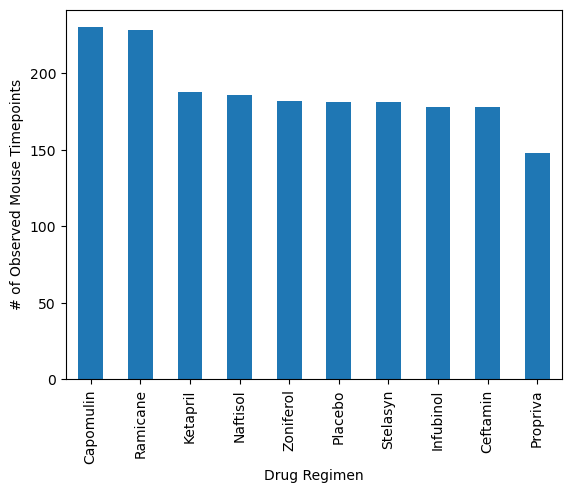

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = clean_mouse_df["Drug Regimen"].value_counts()
mouse_graph = drug_counts.plot(kind="bar")
mouse_graph.set_xlabel('Drug Regimen')
mouse_graph.set_ylabel('# of Observed Mouse Timepoints')


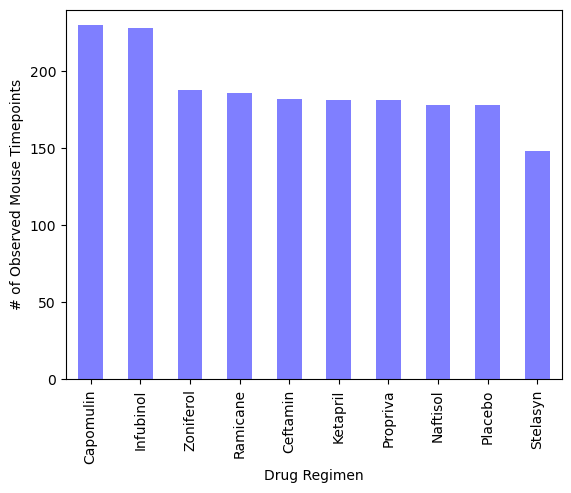

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis=np.arange(len(clean_mouse_df["Drug Regimen"].unique()))

plt.bar(x_axis, drug_counts, color="blue",alpha = 0.50,width=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_mouse_df["Drug Regimen"].unique(), rotation="vertical")

plt.xlim(-0.50, len(x_axis)-0.50)
plt.ylim(0,max(drug_counts)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

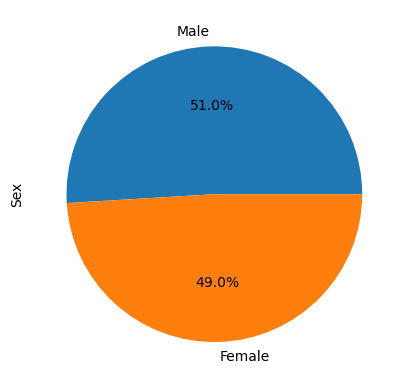

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_distribution = clean_mouse_df["Sex"].value_counts()
colors=["blue","orange"]
sex_graph=mouse_distribution.plot(kind = "pie",autopct="%1.1f%%")

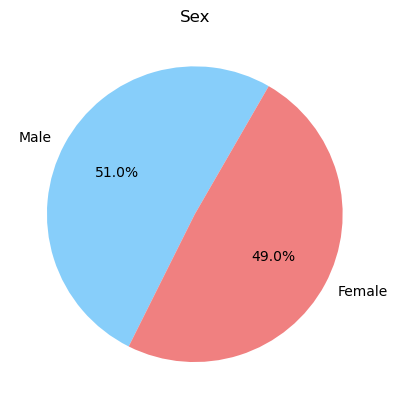

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_distribution, labels=["Male","Female"],colors=["lightskyblue","lightcoral"], autopct="%1.1f%%",startangle=60)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints=clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tp_df=final_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tum_vol=pd.merge(final_tp_df, clean_mouse_df, on=["Mouse ID","Timepoint"])
tum_vol.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df=tum_vol.loc[tum_vol["Drug Regimen"]==x]
    
    # add subset 
    tumor_volumes=tumor_df["Tumor Volume (mm3)"]
    tumor_vol.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volumes.loc[(tumor_volumes<lower_bound)|(tumor_volumes>upper_bound)]
    print(f"{x}'s potential outliers are : {outliers}")


Capomulin's potential outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)


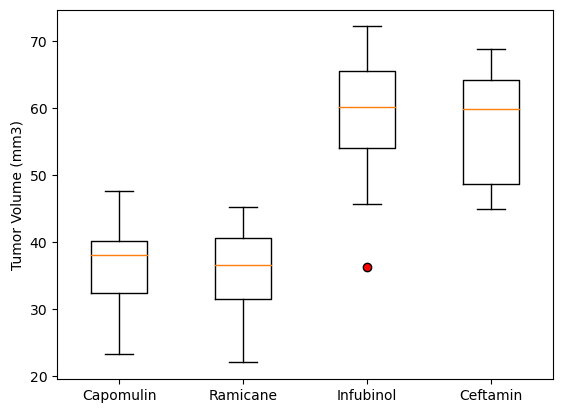

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# source - https://python-charts.com/distribution/box-plot-matplotlib/
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol, flierprops = dict(marker = "o", markerfacecolor = "red"))
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4],treatments)
plt.show()

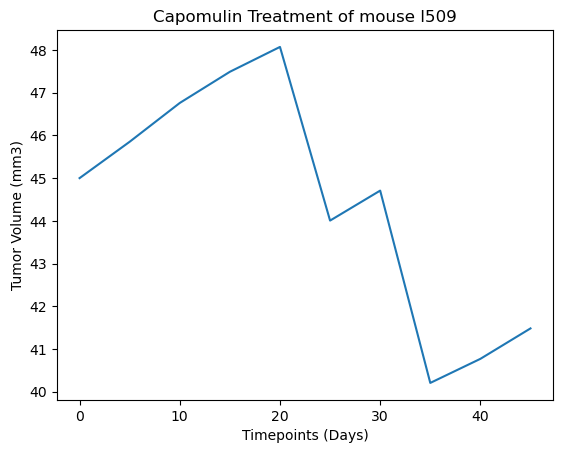

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse=clean_mouse_df.loc[clean_mouse_df["Mouse ID"]=='l509']
x_axis=mouse["Timepoint"]
y_axis=mouse["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis)
plt.xlabel("Timepoints (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
plt.show()

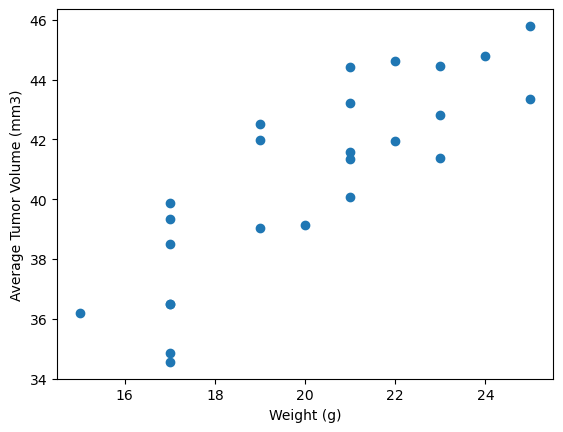

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin=clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin"].reset_index()
mouse_weight=capomulin[["Mouse ID","Weight (g)"]]
ave_tumor_vol=capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

summary=pd.merge(mouse_weight, ave_tumor_vol, on="Mouse ID")
final_df=summary[["Weight (g)","Tumor Volume (mm3)"]].drop_duplicates()

plt.scatter(final_df["Weight (g)"],final_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


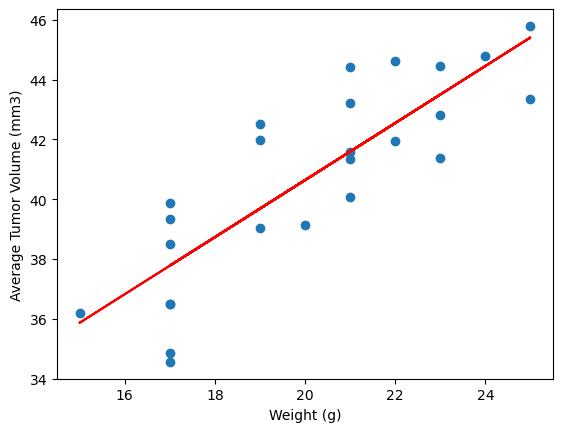

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(final_df["Weight (g)"],final_df["Tumor Volume (mm3)"])

print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(final_df["Weight (g)"],final_df["Tumor Volume (mm3)"])
regress_values = final_df["Weight (g)"] * slope + intercept

plt.scatter(final_df["Weight (g)"],final_df["Tumor Volume (mm3)"])
plt.plot(final_df["Weight (g)"],regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()